In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
import numpy as np
from custom_dataset import Binary_Dataset #, Train_Binary_Dataset, Val_Binary_Dataset, Test_Binary_Dataset
from matplotlib import pyplot as plt
from PIL import Image
import os
from inception import Inception3
%matplotlib inline

# Define Dataloaders for each class


In [2]:
#define relevant paths
labels_dir="Data\list_attr_celeba.csv"
image_dir="Data\img_align_celeba\img_align_celeba"

############################################define batch size for all data loaders here
bathsize=32

##############################################define num workers for data laoders here
workers=4

#define composed transforms

composed = transforms.Compose([transforms.ToTensor()])

labels=["No_Beard","Male","Bald","Bangs","Smiling"]
label_number=0

# no beard
ds0_train = Binary_Dataset(labels_dir, labels[0],image_dir , partition = "Train", transform=composed)
train_dataset_loader = DataLoader(ds0_train,batch_size=bathsize, shuffle=True, num_workers=workers)
ds0_val = Binary_Dataset(labels_dir, labels[0],image_dir ,partition = "Val", transform=composed)
val_dataset_loader = DataLoader(ds0_val,batch_size=bathsize, shuffle=True, num_workers=workers)
ds0_test = Binary_Dataset(labels_dir, labels[0],image_dir ,partition = "Test", transform=composed)
test_dataset_loader = DataLoader(ds0_test,batch_size=bathsize, shuffle=True, num_workers=workers)


""""
# male
ds1_train = Binary_Dataset(labels_dir, labels[1],image_dir , partition = "Train", transform=composed)
train_dataset_loader = DataLoader(ds1_train,batch_size=bathsize, shuffle=True, num_workers=workers)
ds1_val = Binary_Dataset(labels_dir, labels[1],image_dir ,partition = "Val", transform=composed)
val_dataset_loader = DataLoader(ds1_val,batch_size=bathsize, shuffle=True, num_workers=workers)
ds1_test = Binary_Dataset(labels_dir, labels[1],image_dir ,partition = "Test", transform=composed)
test_dataset_loader = DataLoader(ds1_test,batch_size=bathsize, shuffle=True, num_workers=workers)


# bald
ds2_train = Binary_Dataset(labels_dir, labels[2],image_dir , partition = "Train", transform=composed)
train_dataset_loader = DataLoader(ds2_train,batch_size=bathsize, shuffle=True, num_workers=workers)
ds2_val = Binary_Dataset(labels_dir, labels[2],image_dir ,partition = "Val", transform=composed)
val_dataset_loader = DataLoader(ds2_val,batch_size=bathsize, shuffle=True, num_workers=workers)
ds2_test = Binary_Dataset(labels_dir, labels[2],image_dir ,partition = "Test", transform=composed)
test_dataset_loader = DataLoader(ds2_test,batch_size=bathsize, shuffle=True, num_workers=workers)

# bangs
ds3_train = Binary_Dataset(labels_dir, labels[3],image_dir , partition = "Train", transform=composed)
train_dataset_loader = DataLoader(ds3_train,batch_size=bathsize, shuffle=True, num_workers=workers)
ds3_val = Binary_Dataset(labels_dir, labels[3],image_dir ,partition = "Val", transform=composed)
val_dataset_loader = DataLoader(ds3_val,batch_size=bathsize, shuffle=True, num_workers=workers)
ds3_test = Binary_Dataset(labels_dir, labels[3],image_dir ,partition = "Test", transform=composed)
test_dataset_loader = DataLoader(ds3_test,batch_size=bathsize, shuffle=True, num_workers=workers)

# smiling
ds4_train = Binary_Dataset(labels_dir, labels[4],image_dir , partition = "Train", transform=composed)
train_dataset_loader = DataLoader(ds4_train,batch_size=bathsize, shuffle=True, num_workers=workers)
ds4_val = Binary_Dataset(labels_dir, labels[4],image_dir ,partition = "Val", transform=composed)
val_dataset_loader = DataLoader(ds4_val,batch_size=bathsize, shuffle=True, num_workers=workers)
ds4_test = Binary_Dataset(labels_dir, labels[4],image_dir ,partition = "Test", transform=composed)
test_dataset_loader = DataLoader(ds4_test,batch_size=bathsize, shuffle=True, num_workers=workers)
"""

"""
for idx, (data, image) in enumerate(ds):
    print(idx)
"""


data=next(iter(val_dataset_loader))
sample, target = data
#print(sample)
print(target)

tensor([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 0])


In [3]:
print(ds0_train.__len__())
print(ds0_val.__len__())
print(ds0_test.__len__())

162770
19867
19962


No_Beard
tensor(0)


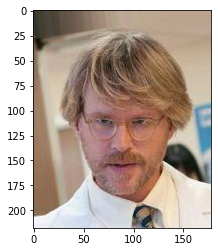

In [11]:
idx=14
plt.imshow(sample[idx])
print(labels[label_number])
print(target[idx])

# Define CNN's

In [5]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# model=inception_v3(pretrained=False).to(device)